# 1

In [13]:
# 1. Считайте из заданного набора данных репозитария UCI значения трех
from matplotlib import pyplot as plt 
import urllib.request
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
data = urllib.request.urlopen (target_url) # object of type 'HTTPResponse'
xList = []
for line in data:
    row = line.strip().decode('latin-1').split(",")
    if len(row)>1:
        xList.append(row)
        
data = pd.DataFrame(xList)
data = data[[1,7,14,15]]
data = data[(data.T != '?').all()]
data.reset_index(drop=True, inplace=True)
data[[1,7,14]] = data[[1,7,14]].astype(float)
data[15] = data[15].astype(str)
target = [1 if i=='+' else 0 for i in data[15]]

# 2

In [14]:
# 2. Если среди меток класса имеются пропущенные значения, то удалите записи с
data.isna().sum()
X = data[[1,7,14]].values

# 3 

In [17]:
# 3. Масштабируйте признаки набора данных на интервал от до .
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# 4 

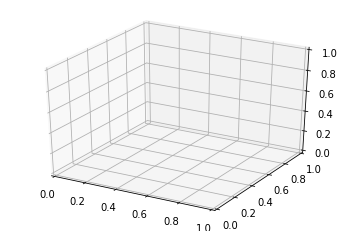

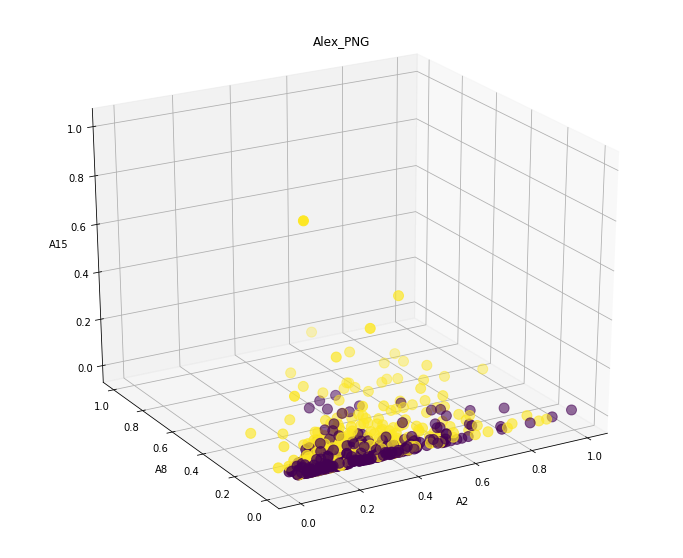

In [19]:
# 4. Визуализируйте набор данных в виде точек пространства с координатами,
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

plt.title('Alex_PNG')
ax.scatter( rescaledX[:,0], rescaledX[:,1], rescaledX[:,2], c=target,s=100 )
ax.set_xlabel('A2')
ax.set_ylabel('A8')
ax.set_zlabel('A15')
ax.view_init( azim=-120, elev=25 )
plt.show()

In [21]:
# 5. Используя разделение набора данных из трех признаков на обучающую и
from sklearn.model_selection import train_test_split

test_size=0.25 # тестовая выборка 30%

X_train, X_test, y_train, y_test = train_test_split(rescaledX, target, test_size=test_size)

In [22]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train);
y_pred = nbc.predict(X_test)


In [24]:
# 6. Постройте и выведите на экран отчет о классификации и матрицу ошибок.
from sklearn.metrics import classification_report
print("Отчет о классификации:\n")
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Класс 1','Класс 2'], columns=['Класс 1','Класс 2'])
print("Матрица ошибок:\n")
cmdf

Отчет о классификации:

              precision    recall  f1-score   support

           0       0.56      0.94      0.70        85
           1       0.81      0.25      0.38        85

    accuracy                           0.59       170
   macro avg       0.68      0.59      0.54       170
weighted avg       0.68      0.59      0.54       170

Матрица ошибок:



,Класс 1,Класс 2
Класс 1,80,5
Класс 2,64,21


In [44]:
# 7. Найдите точность классификации набора данных при помощи наивного
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5

kfold = KFold(n_splits=num_folds)
results = cross_val_score(nbc, rescaledX, target, cv=kfold)
print("Точность: {:.3f} ({:.3f})".format(results.mean()*100.0, results.std()*100.0))

Точность: 65.215 (16.830)


Text(0, 0.5, 'Доля ошибок')

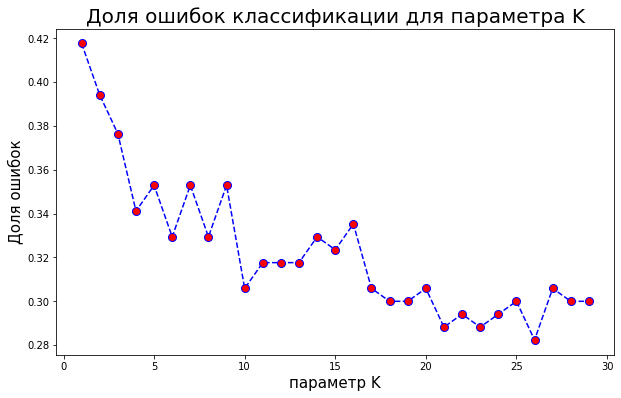

In [40]:
# 8. Используя разделение набора данных из трех признаков на обучающую и
from sklearn.model_selection import train_test_split

test_size=0.25 # тестовая выборка 30%

X_train, X_test, y_train, y_test = train_test_split(rescaledX, target, test_size=test_size)

error_rate = []
#
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Доля ошибок классификации для параметра K', fontsize=20)
plt.xlabel('параметр K',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15)

In [43]:
# 9. Найдите точность классификации набора данных при помощи метода К
knn = KNeighborsClassifier(n_neighbors=26)


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 5

kfold = KFold(n_splits=num_folds)
results = cross_val_score(knn, rescaledX, target, cv=kfold)
print("Точность: {:.3f} ({:.3f})".format(results.mean()*100.0, results.std()*100.0))

Точность: 62.702 (10.380)


In [45]:
# 10. Определите, какой из методов классификации позволяет получить более
print ('NaiveBaies - 65.215 > 62')

NaiveBaies - 65.215 > 62


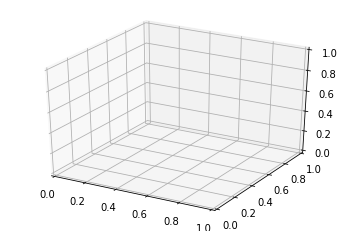

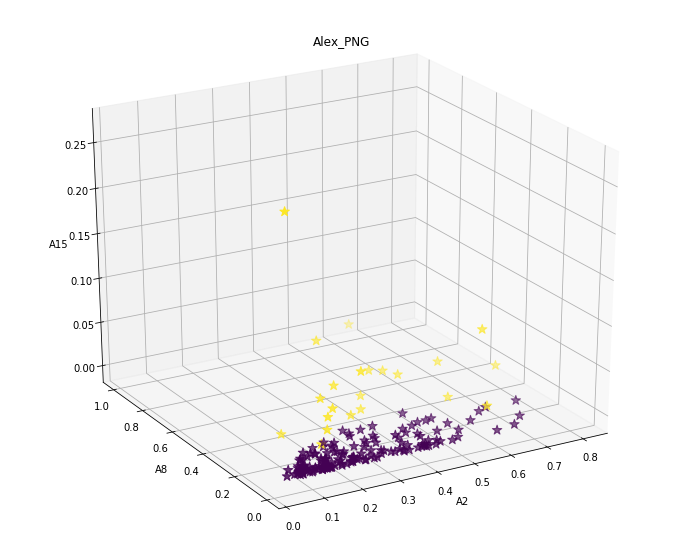

In [46]:
# 11. Проведите классификацию точек набора данных лучшим методом и
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train);

plt.title('Alex_PNG')
ax.scatter( X_test[:,0], X_test[:,1], X_test[:,2], c=nbc.predict(X_test),s=100, marker='*' )
ax.set_xlabel('A2')
ax.set_ylabel('A8')
ax.set_zlabel('A15')
ax.view_init( azim=-120, elev=25 )
plt.show()